In [3]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

import os
import gc
import sys
import glob
import string
import numpy as np
import xarray as xr
import matplotlib as mpl
import mpl_toolkits.axisartist
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)


path = os.getcwd().split('/')
machine_path = '/'+path[1]+'/'+path[2] #cat the /home/user/ or /Users/user from system using path

sys.path.insert(0, f"{machine_path}/opt/mandyoc-scripts/functions")
from mandyocIO import _extract_interface, find_nearest

In [4]:
#Set scenario path
local = False
if(local==True):
    model_path = machine_path
else:
    external_media = 'Joao_Macedo'
    model_path = f"/media/{machine_path.split('/')[-1]}/{external_media}"

scenarios = [f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/keel_stable_DT200_HprodAst_Lx4000km_ck_shallow30_mbwo_Cmb5',
            f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/keel_stable_DT200_HprodAst_Lx4000km_ck_shallow30_mbwo_Cmb3',
            f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/keel_stable_DT200_HprodAst_Lx4000km_ck_shallow30_mbwo_Cmb1',
            f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/ast_wind/keel_stable_DT200_HprodAst_Lx4000km_ck_aw_shallow30_mbwo_Cmb5',
            f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/ast_wind/keel_stable_DT200_HprodAst_Lx4000km_ck_aw_shallow30_mbwo_Cmb3',
            f'{model_path}/Doutorado/cenarios/mandyoc/keel/Lx4000km/cold_keel/thermal_bc_fixed/mobile_belt/shallow_mb/mb_wetol/ast_wind/keel_stable_DT200_HprodAst_Lx4000km_ck_aw_shallow30_mbwo_Cmb1',
            ]



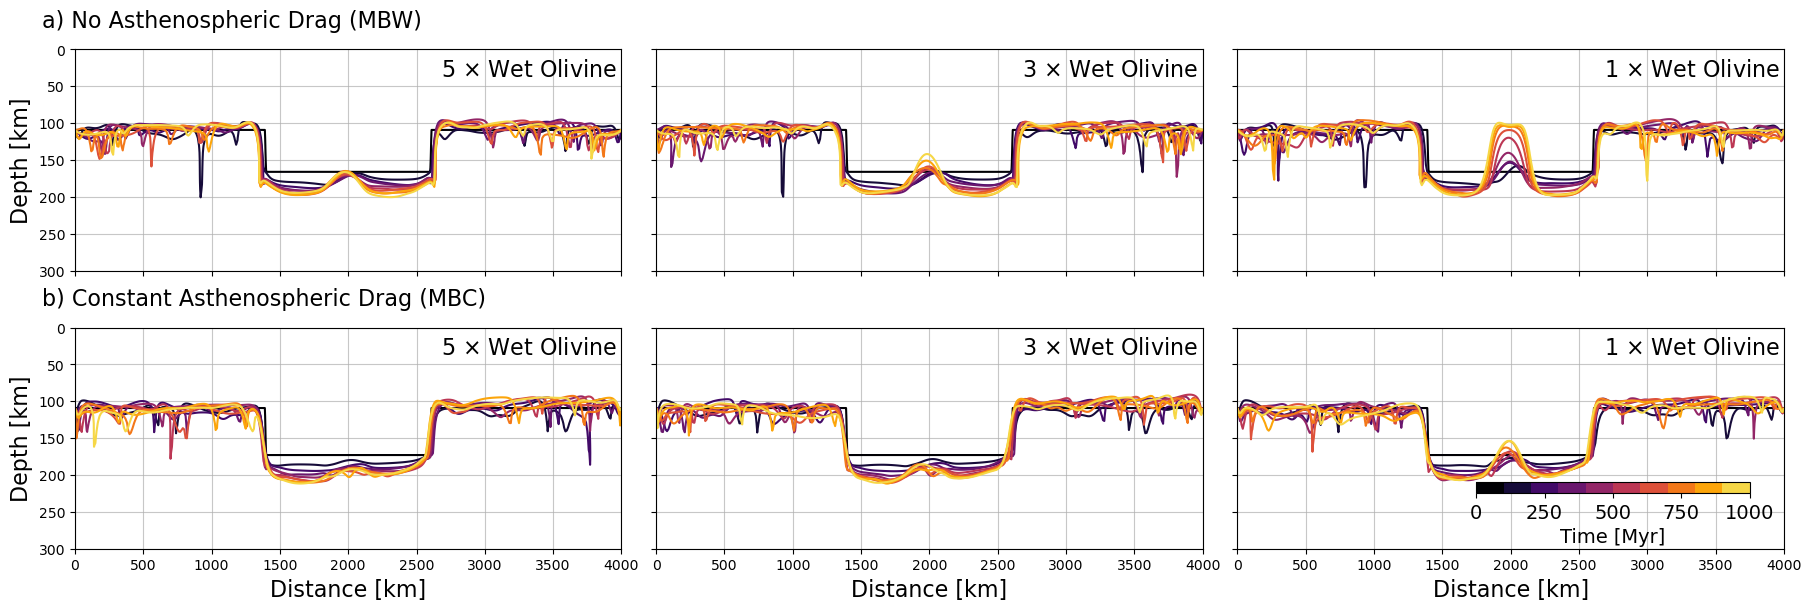

In [7]:
plt.close('all')

fig, axs = plt.subplots(2, 3, figsize=(18, 6), constrained_layout=True, sharex=True, sharey=True)
axs = axs.flatten()

tmin = 0
tmax = 1000
dt = 100

# tmin = 0
# tmax = 500
# dt = 50


instants = np.arange(tmin, tmax, dt, dtype='int') #Myr
colors = plt.cm.inferno(np.linspace(0, 0.9, len(instants)))

for ax, scenario in zip(axs, scenarios):
    dataset = xr.open_dataset(f'{scenario}/_output_temperature.nc')

    Nx = int(dataset.nx)
    Nz = int(dataset.nz)
    Lx = float(dataset.lx)
    Lz = float(dataset.lz)

    instant = dataset.time[-1]

    x = np.linspace(0, Lx/1000.0, Nx)
    z = np.linspace(Lz/1000.0-40, 0-40, Nz)
    xx, zz  = np.meshgrid(x, z)

    for instant, color in zip(instants, colors):
        idx = find_nearest(dataset.time, instant)
        ax.contour(xx, zz, dataset.temperature[idx].values.T, 1, levels=[1250], colors=[color])

############################
#Set plot details
############################
label_fsize = 16

axs[0].text(-0.06, 1.1, f"a) No Asthenospheric Drag (MBW)", transform=axs[0].transAxes, fontsize=16)
axs[3].text(-0.06, 1.1, f"b) Constant Asthenospheric Drag (MBC)", transform=axs[3].transAxes, fontsize=16)

xpos = 0.67
ypos = 0.91
fsize = 16

axs[0].text(xpos, ypos,  r"5 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[0].transAxes)

axs[1].text(xpos, ypos,  r"3 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[1].transAxes)

axs[2].text(xpos, ypos,  r"1 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[2].transAxes)

axs[3].text(xpos, ypos,  r"5 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[3].transAxes)

axs[4].text(xpos, ypos,  r"3 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[4].transAxes)

axs[5].text(xpos, ypos,  r"1 $\times$ Wet Olivine", color='k', fontsize=fsize,
        horizontalalignment='left', verticalalignment='center',
        transform=axs[5].transAxes)


axs[0].set_xlim(0, Lx/1000.0)
axs[0].set_ylim(300, 0)

axs[0].set_ylabel('Depth [km]', fontsize=label_fsize)
axs[3].set_ylabel('Depth [km]', fontsize=label_fsize)

axs[3].set_xlabel('Distance [km]', fontsize=label_fsize)
axs[4].set_xlabel('Distance [km]', fontsize=label_fsize)
axs[5].set_xlabel('Distance [km]', fontsize=label_fsize)

for ax in axs:
    ax.grid('-k', alpha=0.7)


#Creating a legend as a customized colorbar
cmap = ListedColormap(colors) #discrete colors based on infenro cmap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=tmin, vmax=tmax)) #normalize accordind to len(colors)

axins1 = inset_axes(axs[5],
                    loc='lower right',
                    width="100%",  # respective to parent_bbox width
                    height="100%",  # respective to parent_bbox width
                    bbox_to_anchor=(0.45,#horizontal position respective to parent_bbox or "loc" position
                                    0.22,# vertical position
                                    0.5,# width
                                    0.05),# height
                    bbox_transform=axs[5].transAxes
                    )

cbar = fig.colorbar(sm, cax=axins1, orientation='horizontal', fraction=0.08, pad=0.01, format='%.0f')#create colorbar

cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='Time [Myr]', size=14)

figname = f"LAB_evolution_MBW_vs_MBC"
fig.savefig(f"figures/{figname}.png", dpi=200)
fig.savefig(f"figures/{figname}.pdf", dpi=200)